Q1: Outlier Detection

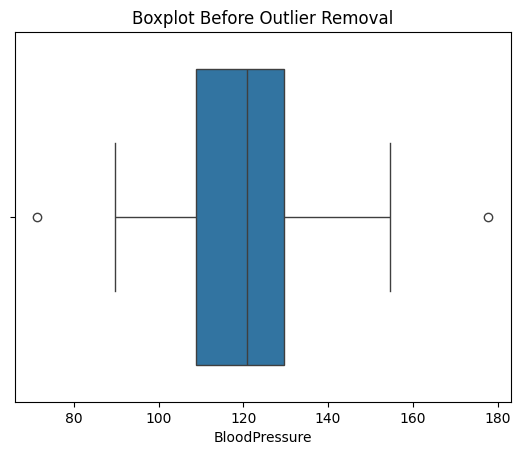

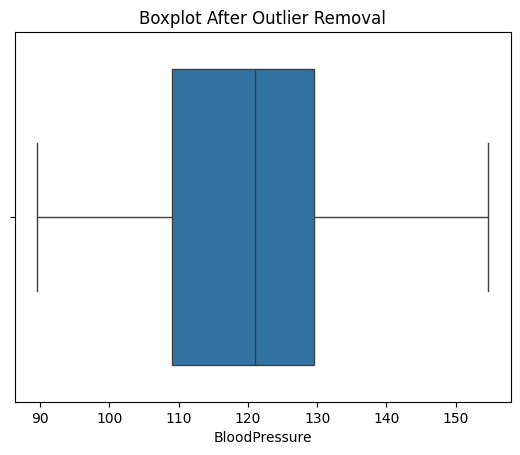

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("patient_data.csv")

# Boxplot before removing outliers
sns.boxplot(x=df['BloodPressure'])
plt.title("Boxplot Before Outlier Removal")
plt.show()

# IQR Method
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter data
df_clean = df[(df['BloodPressure'] >= lower) & (df['BloodPressure'] <= upper)]

# Boxplot after removing outliers
sns.boxplot(x=df_clean['BloodPressure'])
plt.title("Boxplot After Outlier Removal")
plt.show()


Q2: Hypothesis Testing

In [3]:
from scipy import stats
import numpy as np

# --- Part 1: One-sample t-test for CholesterolLevel vs 195 ---
sample = df_clean['CholesterolLevel'].sample(n=20, random_state=1)
t_stat, p_val = stats.ttest_1samp(sample, 195)

print("One-sample t-test:")
print("t-statistic =", round(t_stat, 3))
print("p-value =", round(p_val, 4))

# --- Part 2: Chi-square test for Gender vs RiskCategory ---
table = pd.crosstab(df_clean['Gender'], df_clean['RiskCategory'])
chi2, p, dof, expected = stats.chi2_contingency(table)

print("\nChi-square test:")
print("Chi-square statistic =", round(chi2, 3))
print("p-value =", round(p, 4))


One-sample t-test:
t-statistic = 2.46
p-value = 0.0236

Chi-square test:
Chi-square statistic = 1.856
p-value = 0.3954


 Q3: Modeling with First Order ODE

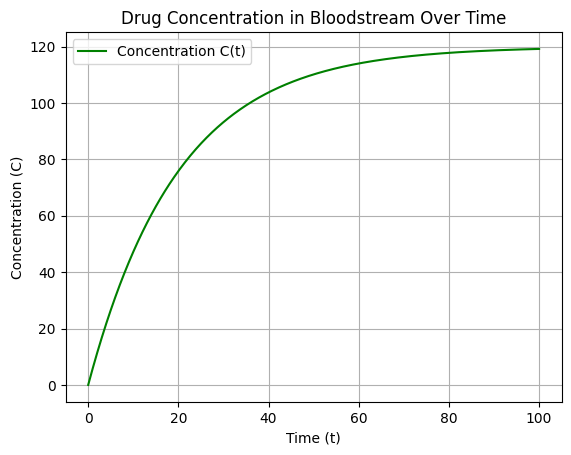

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 0.05
D = 120
t = np.linspace(0, 100, 500)

# Analytical solution: C(t) = D * (1 - exp(-kt))
C = D * (1 - np.exp(-k * t))

# Plot
plt.plot(t, C, label="Concentration C(t)", color='green')
plt.title("Drug Concentration in Bloodstream Over Time")
plt.xlabel("Time (t)")
plt.ylabel("Concentration (C)")
plt.grid(True)
plt.legend()
plt.show()
